<a href="https://colab.research.google.com/github/Neeharika8106/Sentiment-Analysis-Detecting-Depression-in-Tweets-/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('sentiment_tweets3.csv')

In [ ]:
# REVIEW THE DATA

data.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
# RENAMING COLUMNS

data = data.rename(columns = {"message to examine":"Text", "label (depression result)" :"Category" })

In [ ]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

data = data[["Text", "Category"]]

In [ ]:
# REVIEW DATA AFTER CHANGES

data.head(5)

,Text,Category
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
# CHECK THE SHAPE OF THE DATA

data.shape

(10314, 2)

In [ ]:
# CHECK INFO REGARDING IT

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10314 non-null  object
 1   Category  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [ ]:
# CHECK IF THERE ARE NULL VALUES

data.isnull().sum()

Text        0
Category    0
dtype: int64

In [ ]:
# REMOVING DUPLICATE VALUES

data = data.drop_duplicates()

In [ ]:
# CHECKING ALL CATEGORIES

data["Category"].unique()

array([0, 1])

In [ ]:
# RENAMING COLUMNS TO MAKE UNDERSTANDING OF EXPLORATION RESULTS EASIER

data['Category'] = data['Category'].replace(0,'Not Depressed')
data['Category'] = data['Category'].replace(1,'Depressed')

In [ ]:
# CHECKING NO. OF CATEGORIES

data["Category"].value_counts()

Not Depressed    7996
Depressed        2287
Name: Category, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

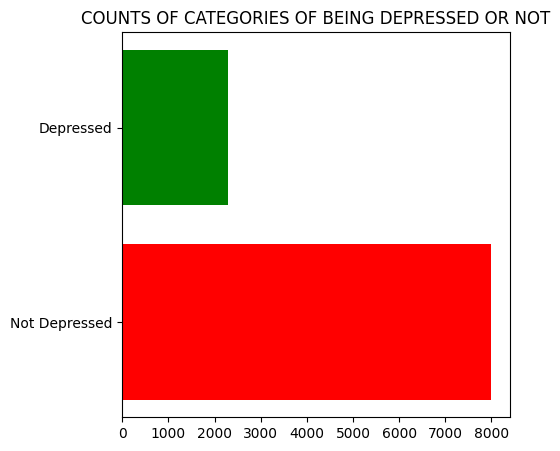

In [ ]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(5,5))
plt.barh(data["Category"].unique(), data["Category"].value_counts(),
         color =['red', 'green'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

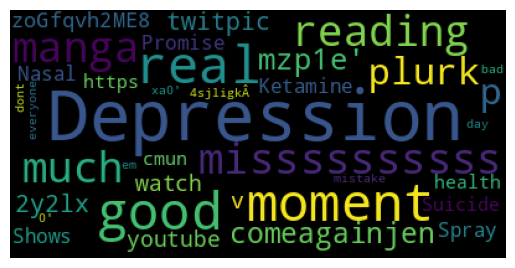

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING WORDCLOUD TO CHECK MOST OCCURING WORDS IN PREPROCESSED DATA

from wordcloud import WordCloud, STOPWORDS
text = data['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

In [ ]:
# RENAMING COLUMNS BACK TO INITIAL ENCODED NUMBERS AS EXPLORATION IS OVER AND WE SHALL NEED ENCODED NUMBERS FOR FURTHER ANALYSIS

data['Category'] = data['Category'].replace('Not Depressed', 0)
data['Category'] = data['Category'].replace('Depressed', 1)

**Text preprossing**

In [ ]:
# INSTALLING TEXTACY LIBRARY FOR PREPROCESSING

%pip install textacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.0 MB/s eta 0:00:00


In [ ]:
# IMPORT OTHER TEXT PREPROCESSING LIBRARIES

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textacy import preprocessing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# SHUFFLING OUR DATASET SINCE IT IS IS UNSHUFFLED AND FIRST 8000 ROWS BELONGED TO A CERTAIN CATEGORY

data = data.sample(frac=1)

In [ ]:
data.tail()

,Text,Category
936,@JohnChow Thanks 4 the follow,0
9958,Farmers urged to talk to allay depression fear...,1
3870,"@uwillbeheard yup, from your comp. to the righ...",0
6067,@berutt sorry for not voting earlier...I was s...,0
10142,I. Cannot. Stand. Depression. I. Just. Want. T...,1


In [ ]:
# CONVERTING TEXT TO LOWER CASE

data["Text"] = data["Text"].str.lower()

In [ ]:
# REMOVING THE STOPWORDS

stop = stopwords.words('english')
print(stop)
data["Text"] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# REMOVING PUNCTUATION, EXTRA WHITESPACES AND HASHTAGS

preprocess = preprocessing.make_pipeline(
    preprocessing.remove.punctuation,
    preprocessing.normalize.whitespace,
    preprocessing.replace.hashtags,
)

data["Text"] = data["Text"].apply(preprocess)

In [ ]:
data.tail()

,Text,Category
936,johnchow thanks 4 follow,0
9958,farmers urged talk allay depression fears http...,1
3870,uwillbeheard yup comp right tweet u fav it the...,0
6067,berutt sorry voting earlier i still bed,0
10142,i cannot stand depression i just want to be okay,1


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# STEMMING THE WORDS

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data['Text'] = data['Text'].apply(lambda x: stemmer.stem(x))

In [ ]:
# REVIEW THE DATA AFTER TEXT PREPROCESSING

data.head()

,Text,Category
2178,originalnipper com,0
7174,celebrated family birthday morning hard work t...,0
6612,want guitar like taylor swift,0
3987,follow naijasdime trying get trending top,0
6404,tony ethan rape screen great,0


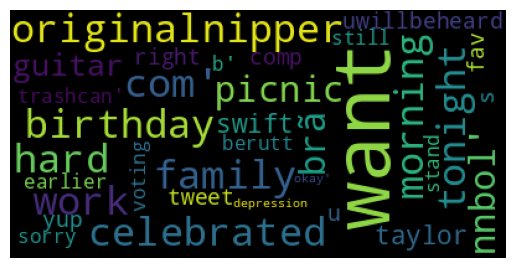

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING WORDCLOUD TO SEE MOST OCCURING WORDS AFTER PREPROCESSING

TEXT_AFTER_PREPROCESS = data['Text'].values

wordcloud = WordCloud().generate(str(TEXT_AFTER_PREPROCESS))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

**Text Vectorization**

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# CREATING CORPUS OF OUR WORDS

corpus = data['Text'].tolist()
print("Corpus:",corpus)

# PRINTING NO. OF WORDS OF OUR CORPUS
print("Total no. of words in our corpus are:", len(corpus),'\n')

Corpus: ['originalnipper com', 'celebrated family birthday morning hard work tonight picnic brã¤nnbol', 'want guitar like taylor swift ', 'follow naijasdime trying get trending top', 'tony ethan rape screen great', 'susancha hehehe lov', 'avi cado think weathersalright hottie yeah said it', 'mazerunnermovie love gonna watch 24 7 social life newt depression hour', 'jab bohat ziada tension aur depression ho relax honay kay liay kya karna chaiay need suggest', 'clinical depression http depression healthomni com 2012 08 30 clinical depression â â\x80¦ pic twitter com 6unnm95qoq', 'hows everyone today', 'spikelike least nice looking better martha i d liked see sally sparrow tho', 'miafreedman hahahaha get new bluetooth haha maybe spray crazy ant spray lol', 'zawfi wow west coast hey morning person mind much', 'ate yummy chocolate bar i m missing baby can t wait till gets hom', 'going today gay parade we re here we re fierce get it xd http plurk com p z3vdv', 'chriscade agreed tis case many 

In [ ]:
# FITTING VECTORIZER TO OUR DATA

vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

TfidfVectorizer()

In [ ]:
# TRANSFORMING OUR DATA

Text_tf = vectorizer.transform(data['Text']).toarray()

In [ ]:
# GETTING TOP 5 WORDS WITH HIGHEST TF-IDF SCORES

feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(Text_tf).flatten()[::-1]

n = 5
top_n = feature_array[tfidf_sorting][:n]
print("The 5 most important words are", top_n, '\n')

# GETTING WORDS WITH THE LEAST TF-IDF SCORES

bottom_n = feature_array[tfidf_sorting][-n:]
print(" The 5 least important words having lowest tf-idf scores are", bottom_n)
print('\n')

The 5 most important words are ['stand' 'cannot' 'just' 'be' 'okay'] 

 The 5 least important words having lowest tf-idf scores are ['parti' 'participants' 'participate' 'particular' '00']




In [ ]:
# REVIEW ONE OF THE VECTORIZED SENTENCE

Text_tf[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# RECHEKING LENGTH OF OUR VECTORIZED ARRAY

print("Length of our vectorized array is:",len(Text_tf), "\n")

Length of our vectorized array is: 10283 




 Our TF-IDF Vector in 2-D Looks like: 



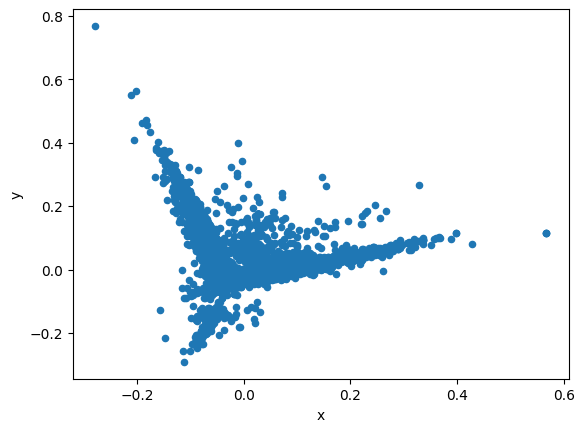

In [ ]:
# VISUALIZING OUR TF-IDF VECTOR IN 2-D USING PCA

from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=2)

df2d = pd.DataFrame(pca.fit_transform(Text_tf), columns=list('xy'))

print('\n', "Our TF-IDF Vector in 2-D Looks like:",'\n')
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [ ]:
# SPLITTING OUR VECTORIZED ARRAY TO TRAINING AND TESTING USING THE 80-20 RULE

x_train = Text_tf[:8000]
x_test = Text_tf[8000:]

In [ ]:
# SPLITTING OUR DEPENDENT VARIABLE INTO TRAINING AND TESTING

y_train = data["Category"].iloc[:8000]
y_test = data["Category"].iloc[8000:]

**FITTING OUR MACHINE LEARNING MODELS**

In [ ]:
# IMPORTING TIME LIBRARY TO PRINT THE TIME TAKEN TO TRAIN AND PREDICT WITH THE MODEL

from time import time

**1) FITTING A MULTIPLE LOGISTIC REGRESSION MODEL**

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [ ]:
# FITTING THE MODEL

lr_t0 = time()

lgr = LogisticRegression()
lgr.fit(x_train, y_train)

print("Training Time of the Logistic Regression Model:", round(time()-lr_t0, 3), "seconds",'\n')

Training Time of the Logistic Regression Model: 8.564 seconds 



In [ ]:
# PREDICTING WITH THE MODEL

lr_t1 = time()

y_pred_lgr = lgr.predict(x_test)

print("Time taken to make predictions for the Logistic Regression Model:", round(time()-lr_t1, 3), "seconds",'\n')

Time taken to make predictions for the Logistic Regression Model: 0.072 seconds 



**2) FITTING A DECISION TREE CLASSIFIER**

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# FITTING THE MODEL

dt_t0=time()

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("Training Time of the Decision Tree Model:", round(time()-dt_t0, 3), "seconds", '\n')

Training Time of the Decision Tree Model: 62.903 seconds 



In [ ]:
# PRINTING MAX DEPTH OF OUR DECISION TREE MODEL

dt_depth = dt.tree_.max_depth
print("Max depth of our Decision Tree Model is:", dt_depth)
print('\n')

Max depth of our Decision Tree Model is: 641




In [ ]:
# PRINTING NO. OF NODES OF OUR DECISION TREE MODEL

dt_nodes = dt.tree_.node_count
print("No. of nodes of our Decision Tree Model is:", dt_nodes)
print('\n')

No. of nodes of our Decision Tree Model is: 1283




In [ ]:
# PREDICTING WITH THE MODEL

dt_t1=time()

y_pred_dt = dt.predict(x_test)

print("Time taken to make predictions for the Decision Tree Model:", round(time()-dt_t1, 3), "seconds",'\n')

Time taken to make predictions for the Decision Tree Model: 0.138 seconds 



**3) FITTING A RANDOM FORESTS CLASSIFIER**

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT RANDOM FORESTS CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# FITTING THE MODEL

rf_t0=time()

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

print("Training Time of the Random Forest Model:", round(time()-rf_t0, 3), "seconds", '\n')

Training Time of the Random Forest Model: 180.104 seconds 



In [ ]:
# PRINTING MAX DEPTH OF OUR RANDOM FOREST MODEL

rf_depth = rf.estimators_[0].tree_.max_depth
print("Max depth of our Decision Tree Model is:", rf_depth)
print('\n')

Max depth of our Decision Tree Model is: 309




In [ ]:
# PRINTING NUMBER OF ESTIMATORS (DECISION TREES) USED IN BUILDING OUR RNADOM FOREST MODEL

n_nodes = rf.estimators_
print("No. of estimators (decision trees) used for building our Random Forest model are:",len(n_nodes))
print("\n")

No. of estimators (decision trees) used for building our Random Forest model are: 100




In [ ]:
# PREDICTING WITH THE MODEL

rf_t1 = time()

y_pred_rf = rf.predict(x_test)

print("Time taken to make predictions for the Random Forest Model:", round(time()-rf_t1, 3), "seconds", '\n')

Time taken to make predictions for the Random Forest Model: 0.763 seconds 



**4) FITTING A Naive Bayes (MultinomialNB) classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# FITTING THE MODEL

nb_t0=time()

nb = MultinomialNB()
nb.fit(x_train, y_train)
print("Training Time of the Naive bayes Model:", round(time()-nb_t0, 3), "seconds", '\n')

Training Time of the Naive bayes Model: 0.735 seconds 



In [ ]:
# PREDICTING WITH THE MODEL

nb_t1 = time()

y_pred_nb = nb.predict(x_test)

print("Time taken to make predictions for the Random Forest Model:", round(time()-nb_t1, 3), "seconds", '\n')

Time taken to make predictions for the Random Forest Model: 0.105 seconds 



**5) FITTING A SVM model**

**EVALUATING OUR MODELS**

In [ ]:
# IMPORTING LIBRARIES TO EVALAUTE MODELS

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# CHECKING THE ACCURACY SCORES OF MODELS

print("THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS:", "\n")
print("Accuracy Score of our Logistic Regression model is: ", accuracy_score(y_pred_lgr, y_test), "\n")
print("Accuracy Score of our Decision Tree Classifier is: ", accuracy_score(y_pred_dt, y_test), "\n")
print("Accuracy Score of our Random Forest Classifier is: ", accuracy_score(y_pred_rf, y_test), "\n")
print("Accuracy Score of our Naive bayes Classifier is: ", accuracy_score(y_pred_nb, y_test), "\n")


THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS: 

Accuracy Score of our Logistic Regression model is:  0.979413053000438 

Accuracy Score of our Decision Tree Classifier is:  0.9356110381077529 

Accuracy Score of our Random Forest Classifier is:  0.9667104686815593 

Accuracy Score of our Naive bayes Classifier is:  0.9097678493210688 



<Figure size 2000x2000 with 0 Axes>

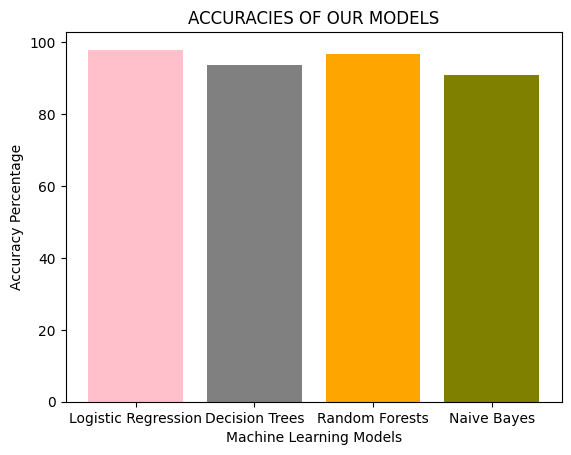

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# COMPARING THE ACCURACIES OF MODELS USING A BAR PLOT

plt.bar(x = ["Logistic Regression","Decision Trees", "Random Forests","Naive Bayes"], height = [(accuracy_score(y_pred_lgr, y_test))*100, (accuracy_score(y_pred_dt, y_test))*100,(accuracy_score(y_pred_rf, y_test))*100,(accuracy_score(y_pred_nb, y_test))*100 ], color = ["pink", "gray", "orange","olive"])
plt.title("ACCURACIES OF OUR MODELS")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Machine Learning Models")

plt.figure(figsize=(20,20))

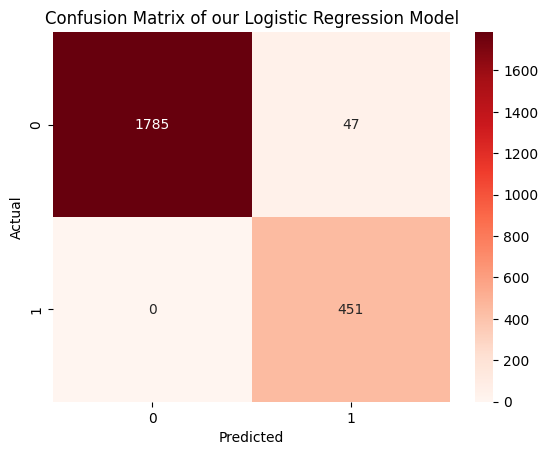

The no. of true positives are: 1785 

The no. of true negatives are: 451 



In [ ]:
# CONFUSION MATRIX FOR OUR LOGISTIC REGRESSION MODEL
import seaborn as sns
import matplotlib.pyplot as plt

confusion_lgr = confusion_matrix(y_pred_lgr, y_test)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_lgr, annot=True, fmt='d', cmap='Reds')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Logistic Regression Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_lgr[0,0], "\n")
print("The no. of true negatives are:", confusion_lgr[1,1], "\n")

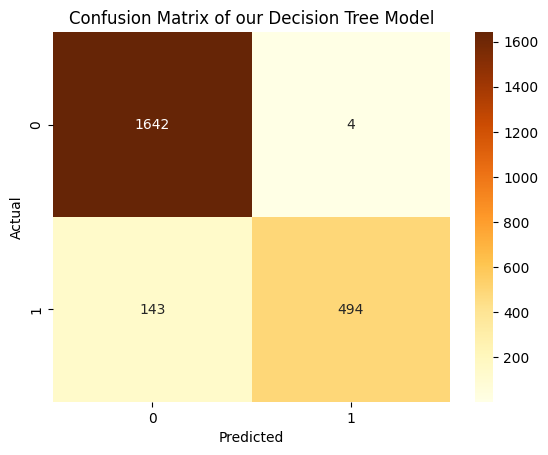

The no. of true positives are: 1642 

The no. of true negatives are: 494 



In [ ]:
# CONFUSION MATRIX FOR OUR DECISION TREES CLASSIFIER MODEL

confusion_dt = confusion_matrix(y_pred_dt, y_test)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='YlOrBr')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Decision Tree Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_dt[0,0], "\n")
print("The no. of true negatives are:", confusion_dt[1,1], "\n")

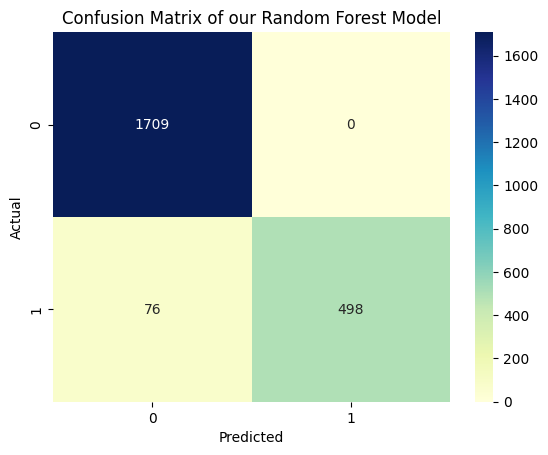

The no. of true positives are: 1709 

The no. of true negatives are: 498 



In [ ]:
# CONFUSION MATRIX FOR OUR RANDOM FORESTS CLASSIFIER MODEL

confusion_rf = confusion_matrix(y_pred_rf, y_test)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='YlGnBu')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Random Forest Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_rf[0,0], "\n")
print("The no. of true negatives are:", confusion_rf[1,1], "\n")

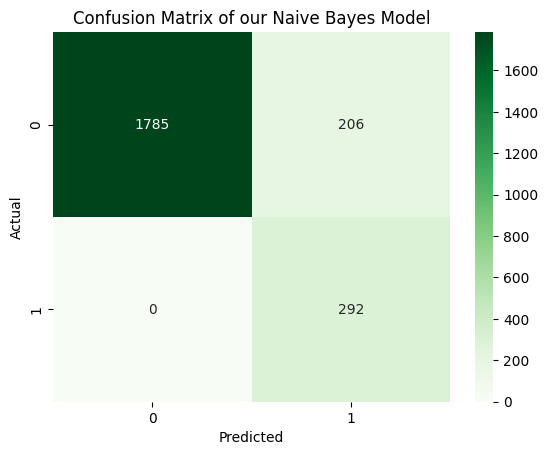

The no. of true positives are: 1785 

The no. of true negatives are: 292 



In [ ]:
# CONFUSION MATRIX FOR OUR Naive bayes CLASSIFIER MODEL

confusion_nb = confusion_matrix(y_pred_nb, y_test)
# Create a heatmap of the confusion matrix with color mapping
sns.heatmap(confusion_nb, annot=True, fmt='d', cmap='Greens')
# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of our Naive Bayes Model')
# Display the plot
plt.show()
print("The no. of true positives are:", confusion_nb[0,0], "\n")
print("The no. of true negatives are:", confusion_nb[1,1], "\n")

In [ ]:
# CHECKING THE Precision SCORES OF MODELS

print("THE Precision values OF OUR MODELS:", "\n")
print("Precision of our Logistic Regression model is: ", precision_score(y_pred_lgr, y_test), "\n")
print("Precision of our Decision Tree Classifier is: ", precision_score(y_pred_dt, y_test), "\n")
print("Precision of our Random Forest Classifier is: ", precision_score(y_pred_rf, y_test), "\n")
print("Precision of our Naive Bayes Classifier is: ", precision_score(y_pred_nb, y_test), "\n")

THE Precision values OF OUR MODELS: 

Precision of our Logistic Regression model is:  0.9056224899598394 

Precision of our Decision Tree Classifier is:  0.9919678714859438 

Precision of our Random Forest Classifier is:  1.0 

Precision of our Naive Bayes Classifier is:  0.5863453815261044 



In [ ]:
# CHECKING THE RECALL SCORE

print("THE RECALL SCORES OF OUR MODELS", "\n")
print("Recall Score of our Logistic Regression model is: ", recall_score(y_pred_lgr, y_test), "\n")
print("Recall Score of our Decision Tree Classifier is: ", recall_score(y_pred_dt, y_test), "\n")
print("Recall Score of our Random Forest Classifier is: ", recall_score(y_pred_rf, y_test), "\n")
print("Recall Score of our Naive Bayes Classifier is: ", recall_score(y_pred_nb, y_test), "\n")


THE RECALL SCORES OF OUR MODELS 

Recall Score of our Logistic Regression model is:  1.0 

Recall Score of our Decision Tree Classifier is:  0.7755102040816326 

Recall Score of our Random Forest Classifier is:  0.867595818815331 

Recall Score of our Naive Bayes Classifier is:  1.0 



In [ ]:
# CHECKING THE F1 SCORES OF MODELS

print("THE F1 SCORES OF OUR MODELS:", "\n")
print("F1 Score of our Logistic Regression model is: ", f1_score(y_pred_lgr, y_test), "\n")
print("F1 Score of our Decision Tree Classifier is: ", f1_score(y_pred_dt, y_test), "\n")
print("F1 Score of our Random Forest Classifier is: ", f1_score(y_pred_rf, y_test), "\n")
print("F1 Score of our Naive Bayes Classifier is: ", f1_score(y_pred_nb, y_test), "\n")


THE F1 SCORES OF OUR MODELS: 

F1 Score of our Logistic Regression model is:  0.9504741833508956 

F1 Score of our Decision Tree Classifier is:  0.8704845814977974 

F1 Score of our Random Forest Classifier is:  0.9291044776119403 

F1 Score of our Naive Bayes Classifier is:  0.7392405063291139 



In [ ]:
# CHECKING THE classification report OF MODELS

print("THE classification report OF OUR MODELS:", "\n")
print("classification report of our Logistic Regression model is: \n", classification_report(y_pred_lgr, y_test), "\n")
print("classification report of our Decision Tree Classifier is: \n", classification_report(y_pred_dt, y_test), "\n")
print("classification report of our Random Forest Classifier is: \n", classification_report(y_pred_rf, y_test), "\n")
print("classification report of our Naive Bayes Classifier is: \n", classification_report(y_pred_nb, y_test), "\n")

THE classification report OF OUR MODELS: 

classification report of our Logistic Regression model is: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1832
           1       0.91      1.00      0.95       451

    accuracy                           0.98      2283
   macro avg       0.95      0.99      0.97      2283
weighted avg       0.98      0.98      0.98      2283
 

classification report of our Decision Tree Classifier is: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1646
           1       0.99      0.78      0.87       637

    accuracy                           0.94      2283
   macro avg       0.96      0.89      0.91      2283
weighted avg       0.94      0.94      0.93      2283
 

classification report of our Random Forest Classifier is: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1709
         